In [2]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
sns.set_theme(color_codes = True)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, jaccard_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [4]:
df = pd.read_csv("cardiodisease.csv")
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [5]:
#checking the no. of unique values from all of object datatype
df.select_dtypes(include = "object").nunique()

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

In [6]:
# list of categorical plot variables
cat_vars = ["General_Health", "Checkup", "Exercise", "Skin_Cancer", "Other_Cancer", "Depression", "Diabetes",
            "Arthritis", "Sex", "Age_Category", "Smoking_History"]

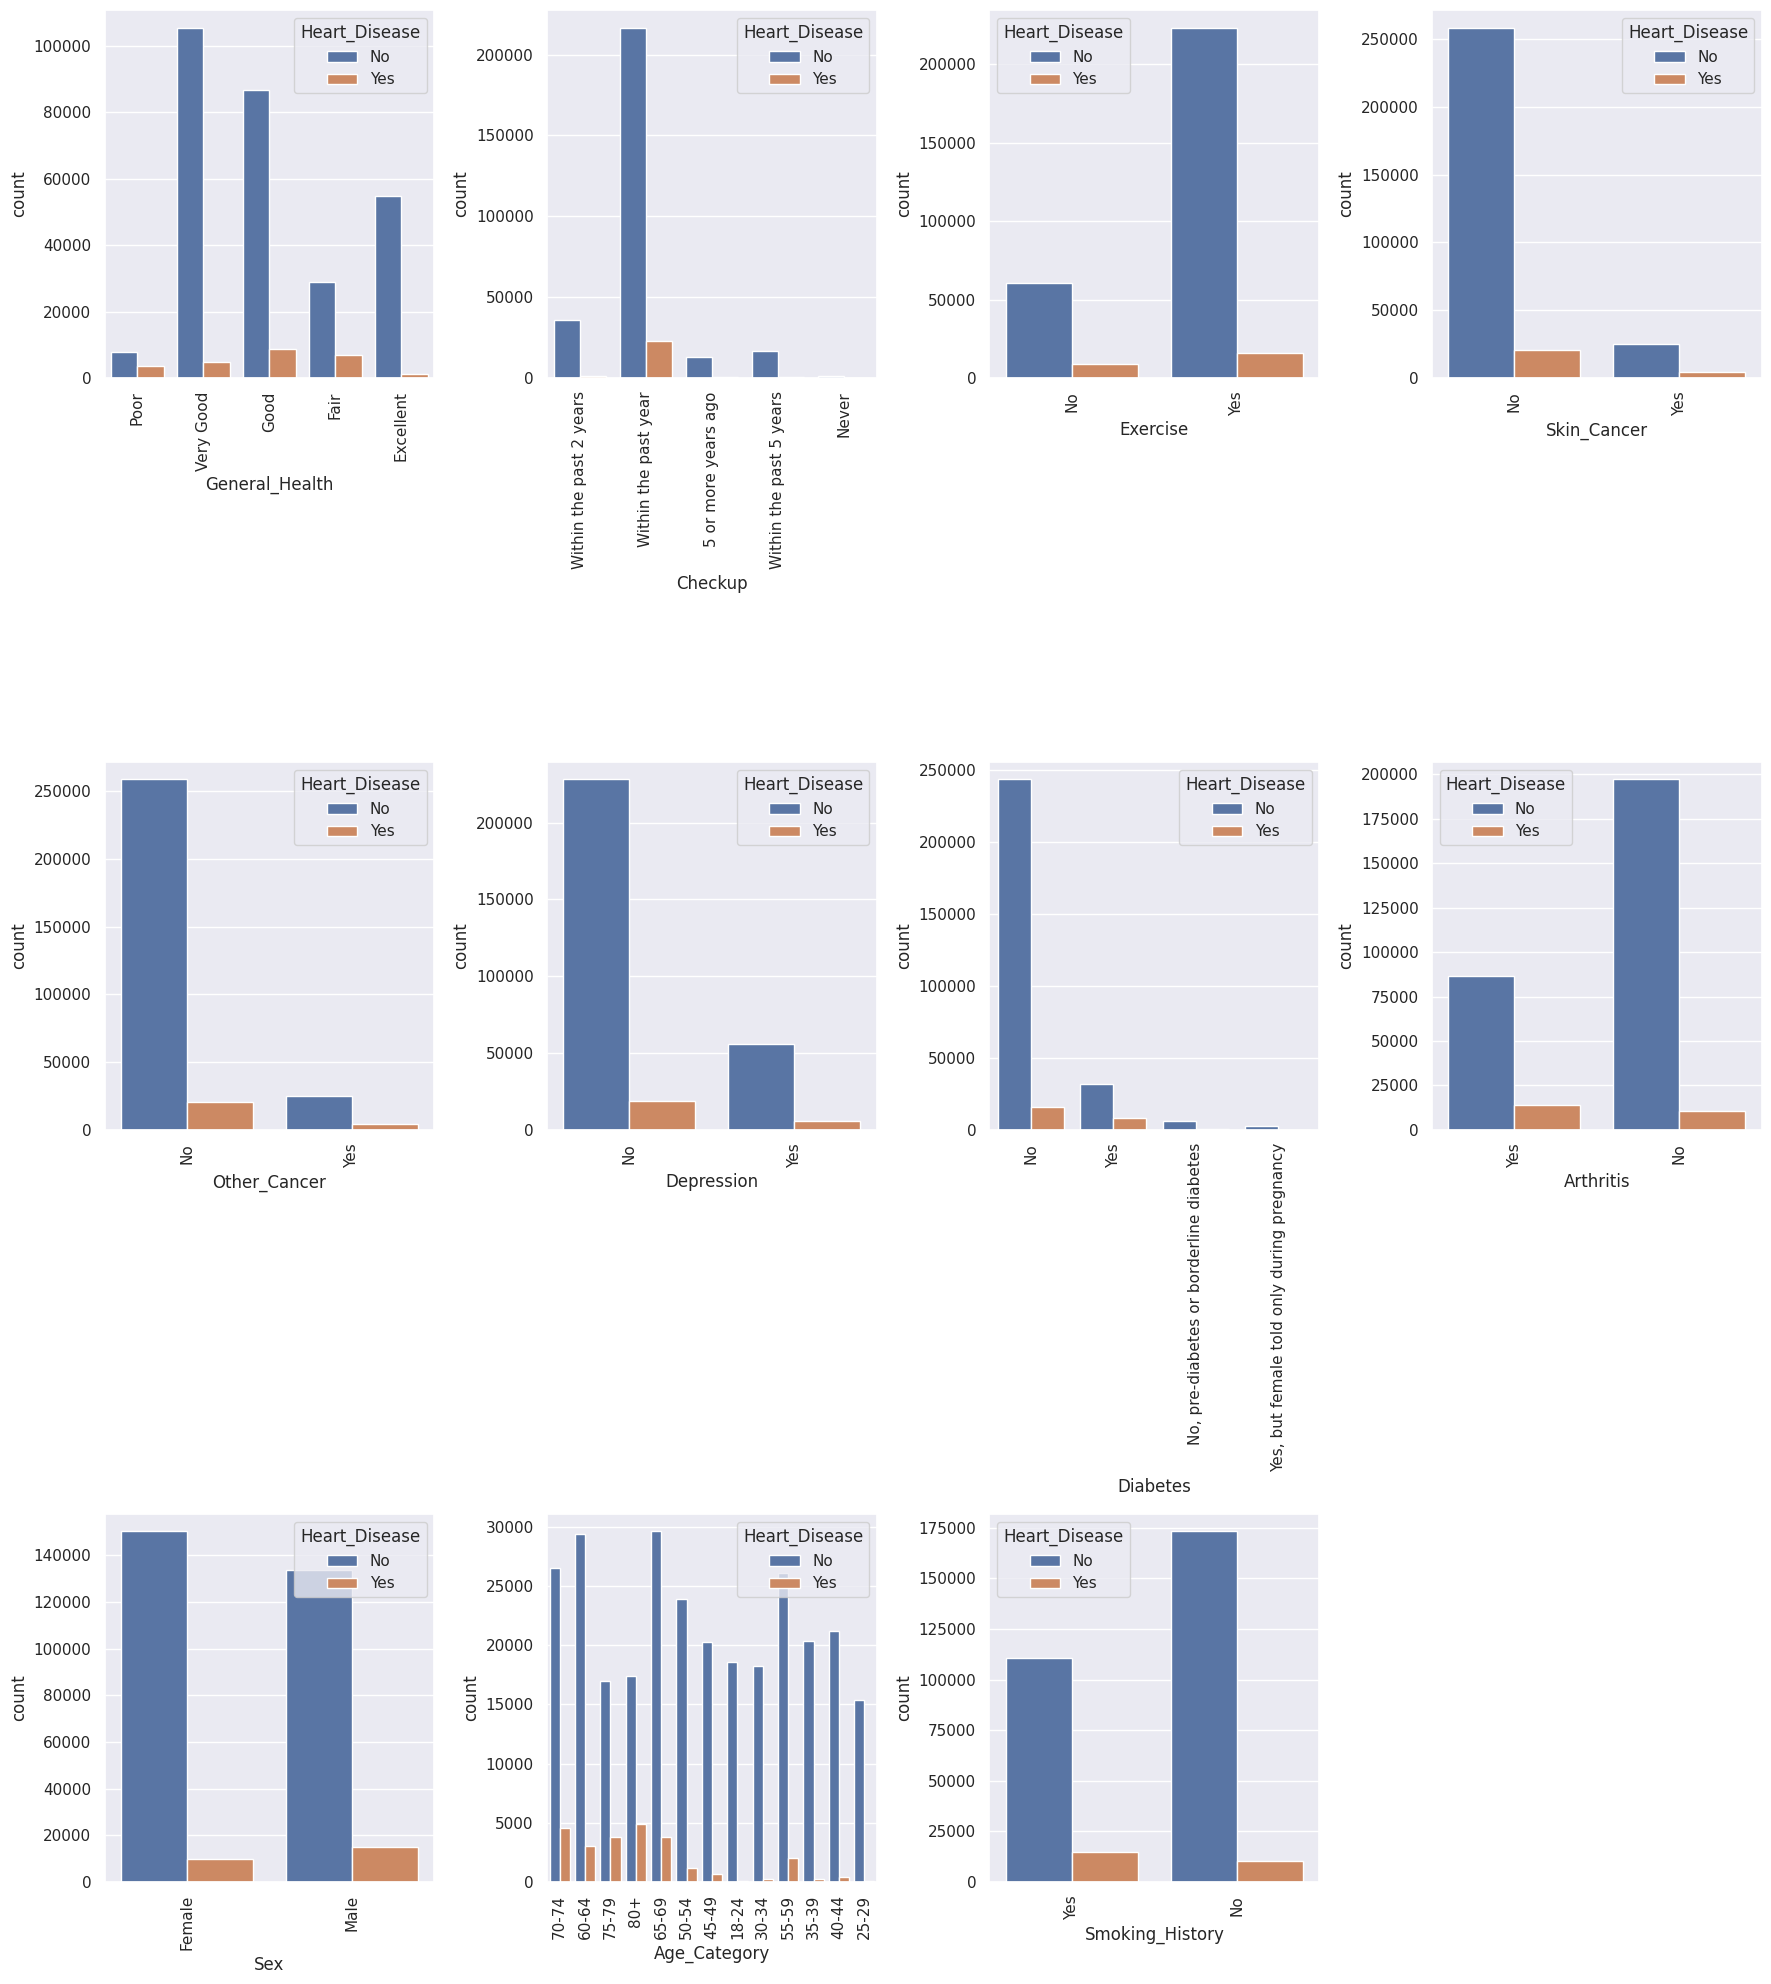

In [7]:
#creating figures with subplots
fig, axs = plt.subplots(nrows = 3, ncols =4, figsize = (18,20))
axs = axs.flatten()

# creating barplot for each category value
for i, var in enumerate(cat_vars):
    sns.countplot(x = var, hue = "Heart_Disease", data = df, ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

# adjusting spacing
fig.tight_layout()

# removing the subplot 12
fig.delaxes(axs[11])

#show plot
plt.show()

In [8]:
import warnings
warnings.filterwarnings("ignore")

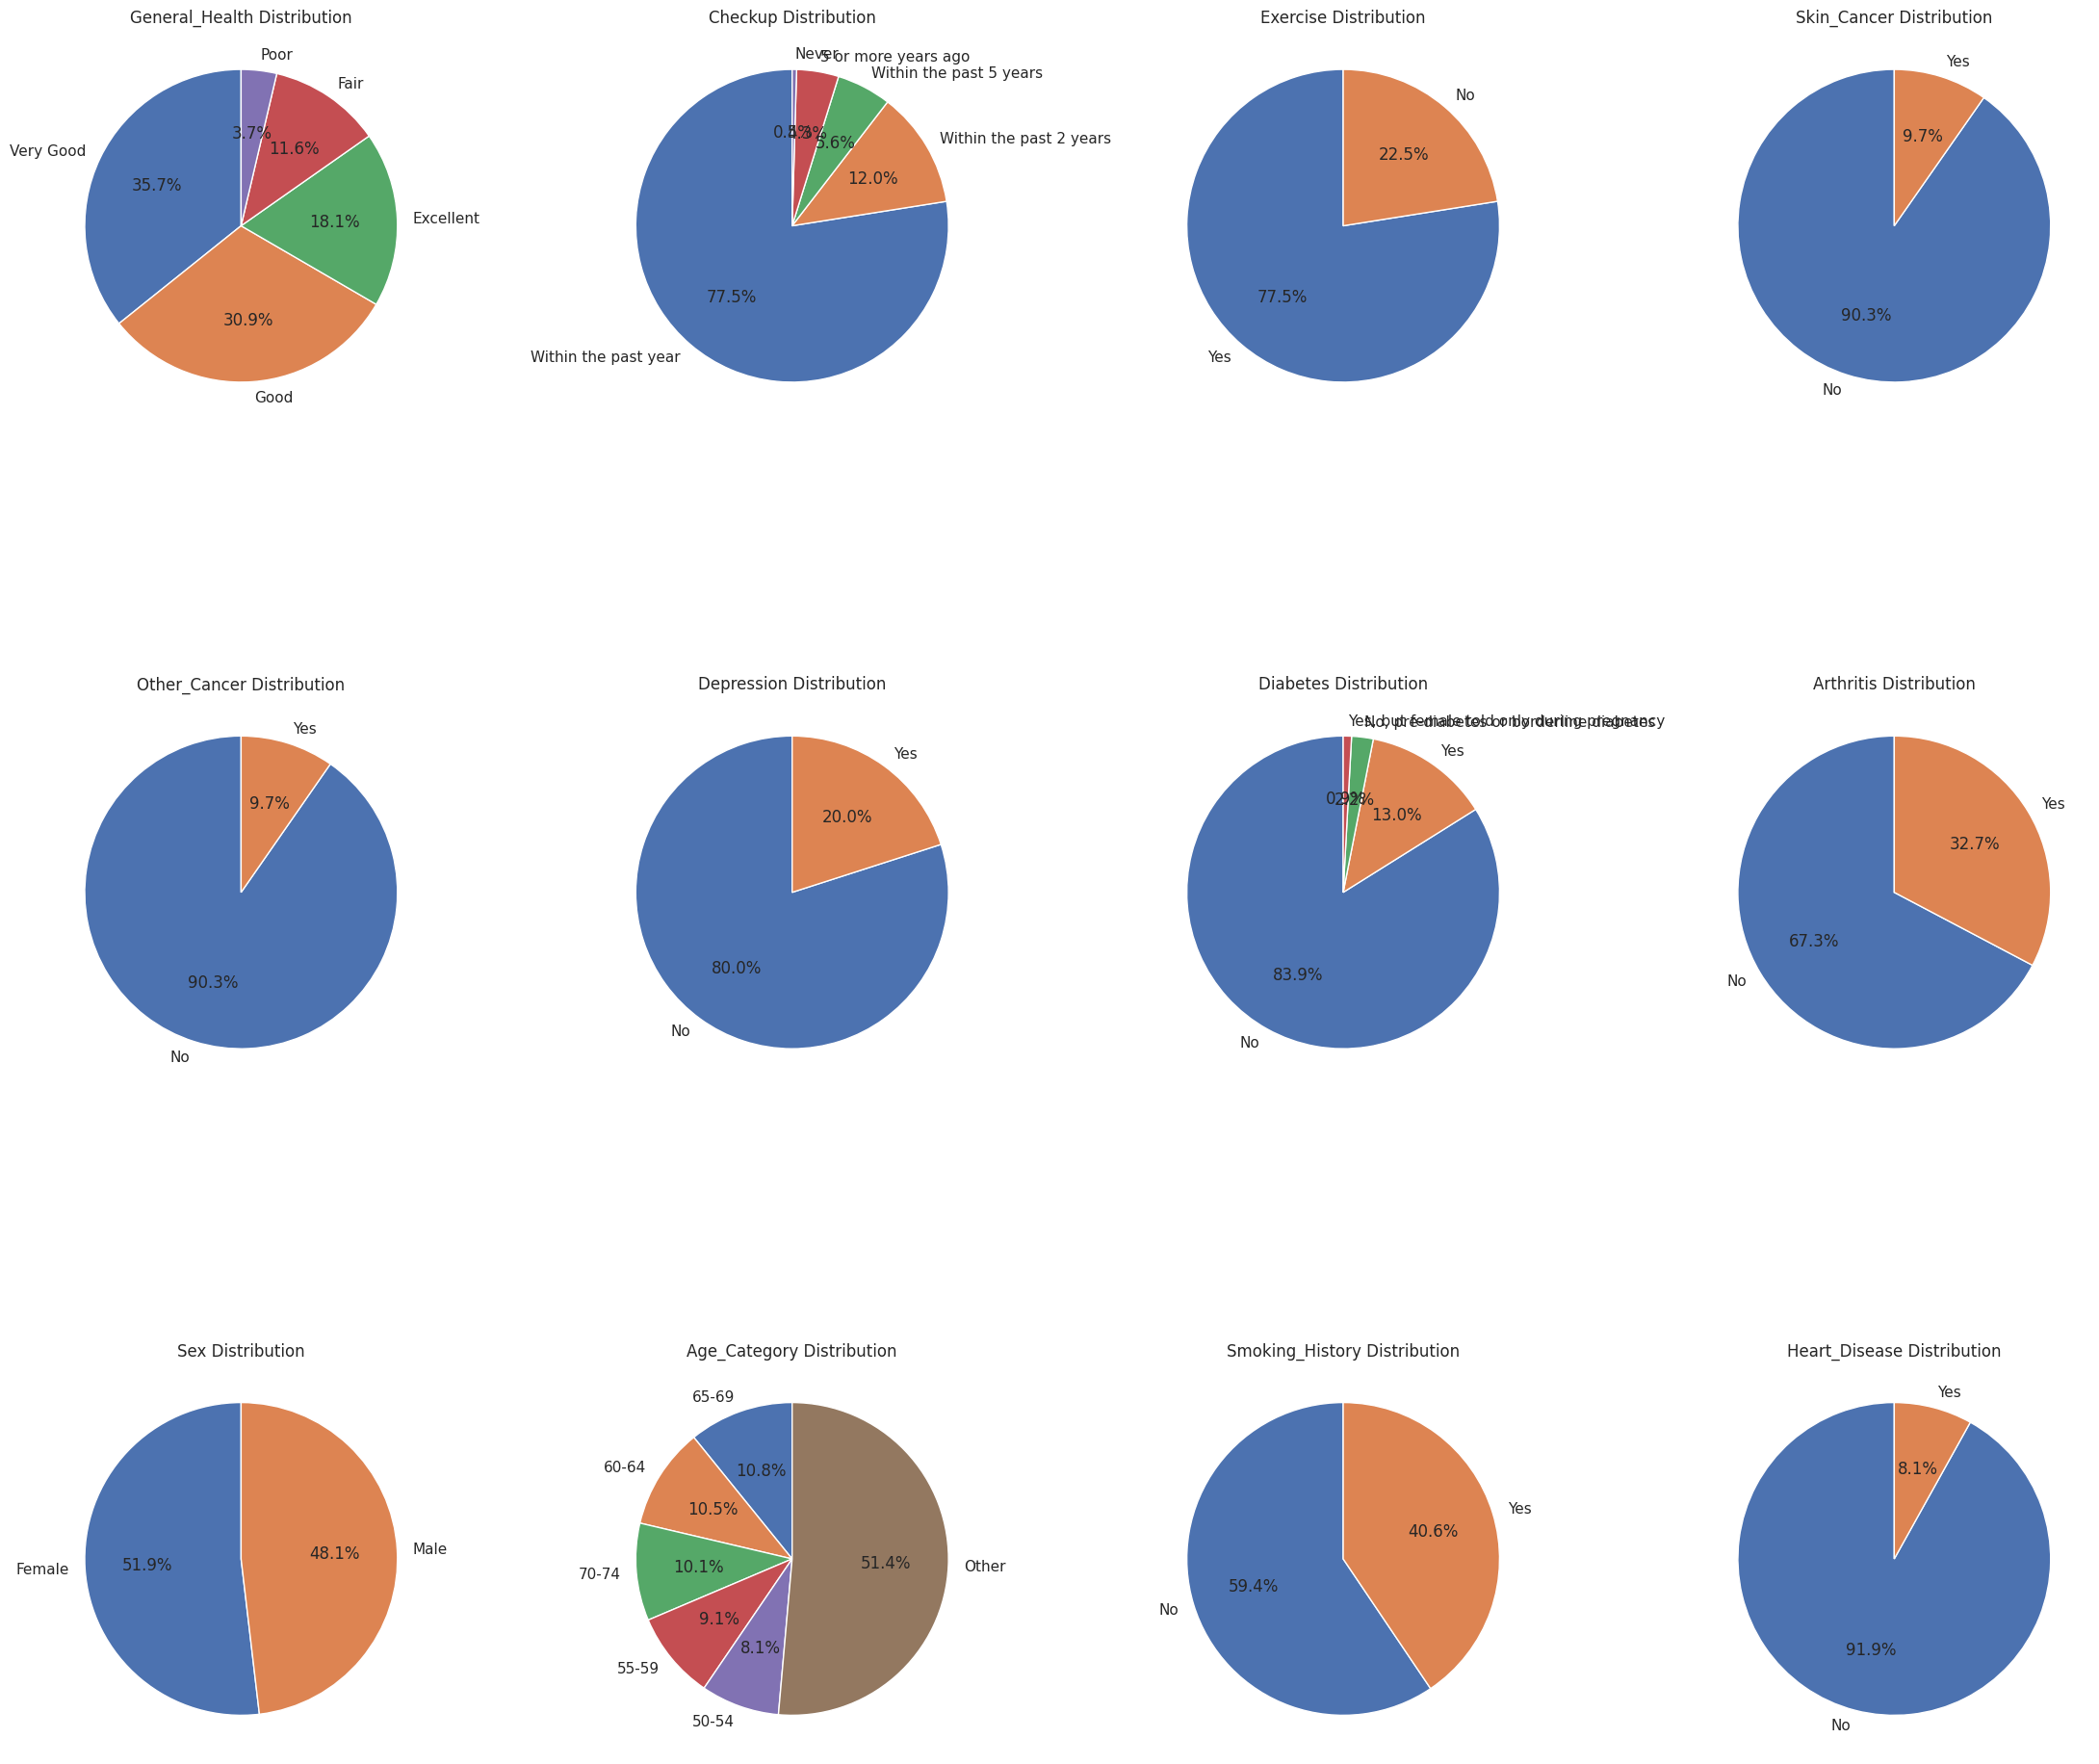

In [9]:
max_categories = 5

# list of categorical plot variables
cat_vars = ["General_Health", "Checkup", "Exercise", "Skin_Cancer", "Other_Cancer", "Depression", "Diabetes",
            "Arthritis", "Sex", "Age_Category", "Smoking_History", "Heart_Disease"]

# create a figure and axes
fig, axs = plt.subplots(nrows = 3, ncols =4, figsize = (22,22))

# creating pie chart for each category value
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        cat_counts = df[var].value_counts()

    if len(cat_counts) > max_categories:
        cat_counts_top = cat_counts[:max_categories]
        cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index = ["Other"])
        cat_counts = cat_counts_top.append(cat_counts_other)

    axs.flat[i].pie(cat_counts, labels = cat_counts.index, autopct = "%1.1f%%", startangle=90)

    axs.flat[i].set_title(f"{var} Distribution")

# adjusting spacing
fig.tight_layout()

#show plot
plt.show()

In [10]:
num_vars = ["Height_(cm)", "Weight_(kg)", "BMI", "Alcohol_Consumption", "Fruit_Consumption",
           "Green_Vegetables_Consumption", "FriedPotato_Consumption"]

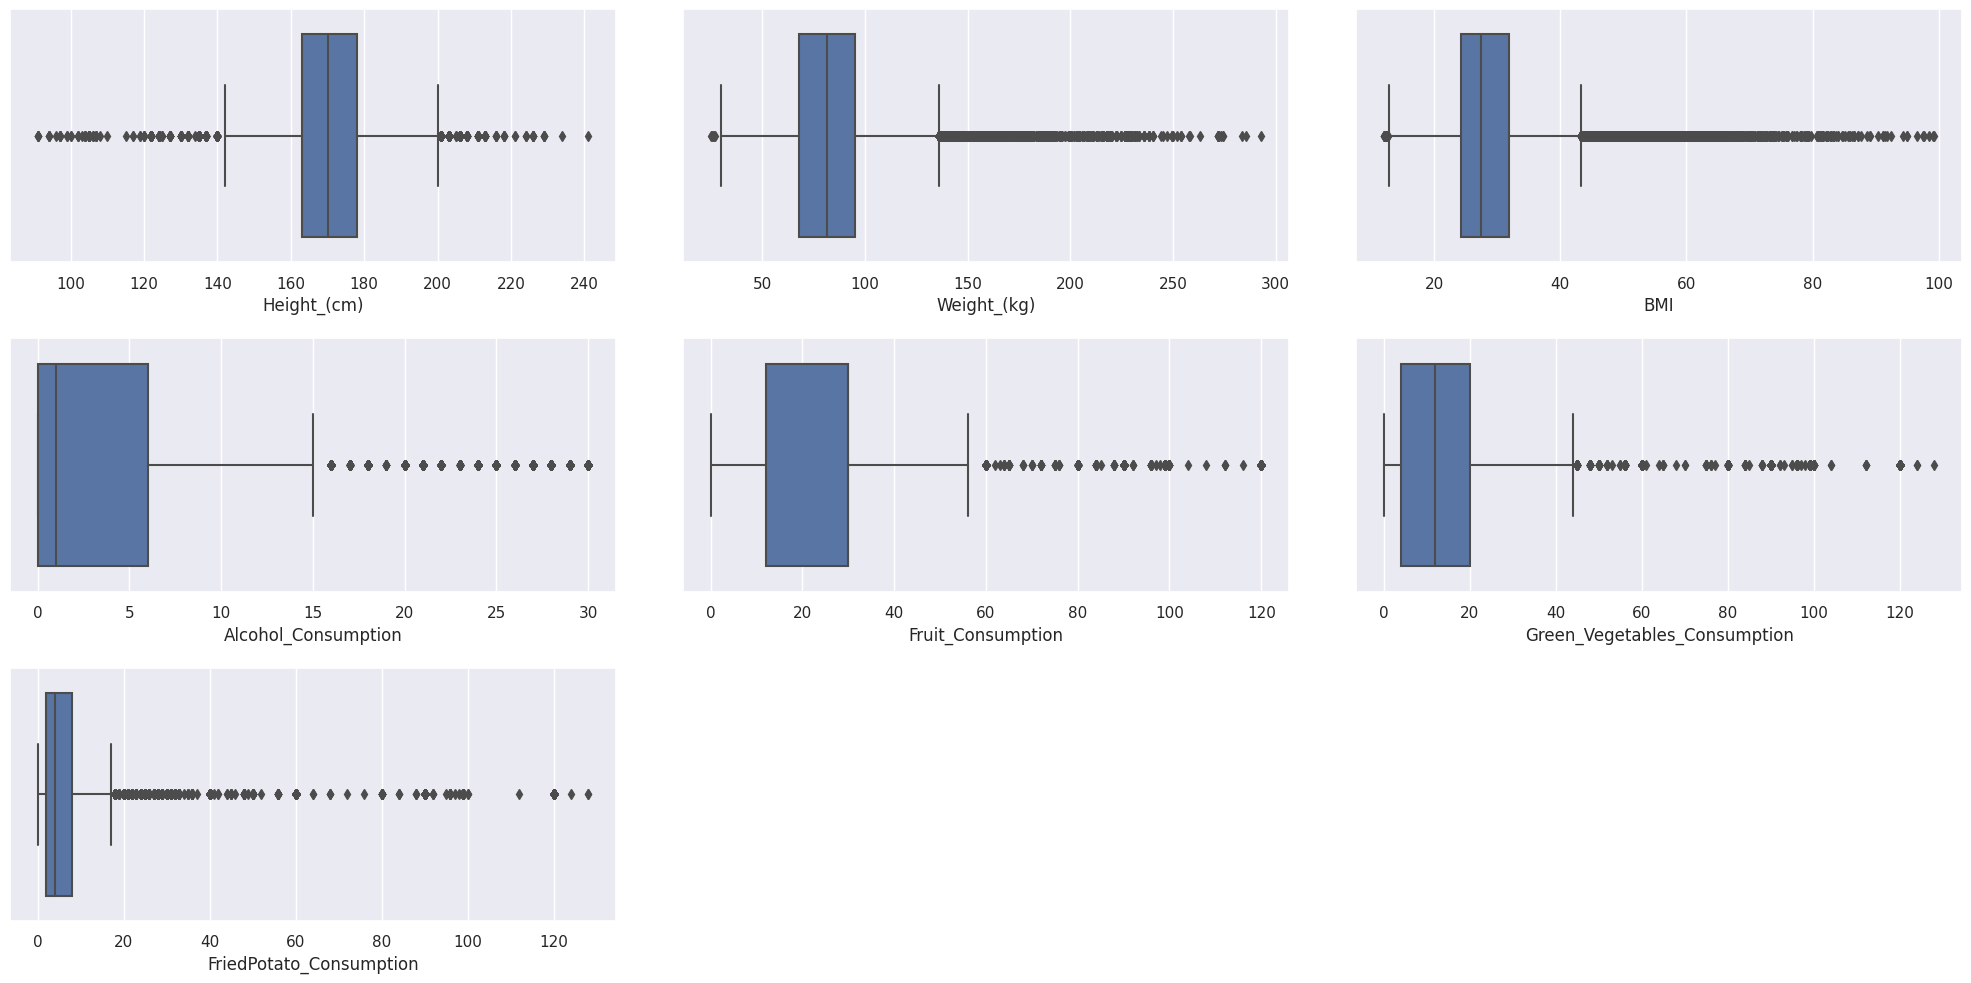

In [11]:
fig, axs = plt.subplots(nrows = 3, ncols =3, figsize = (20,10))
axs = axs.flatten()

# creating box plot for each category value
for i, var in enumerate(num_vars):
    sns.boxplot(x = var, data = df, ax = axs[i])

# adjusting spacing
fig.tight_layout()

# removing the subplot 8
fig.delaxes(axs[7])

# removing the subplot 9
fig.delaxes(axs[8])

#show plot
plt.show()

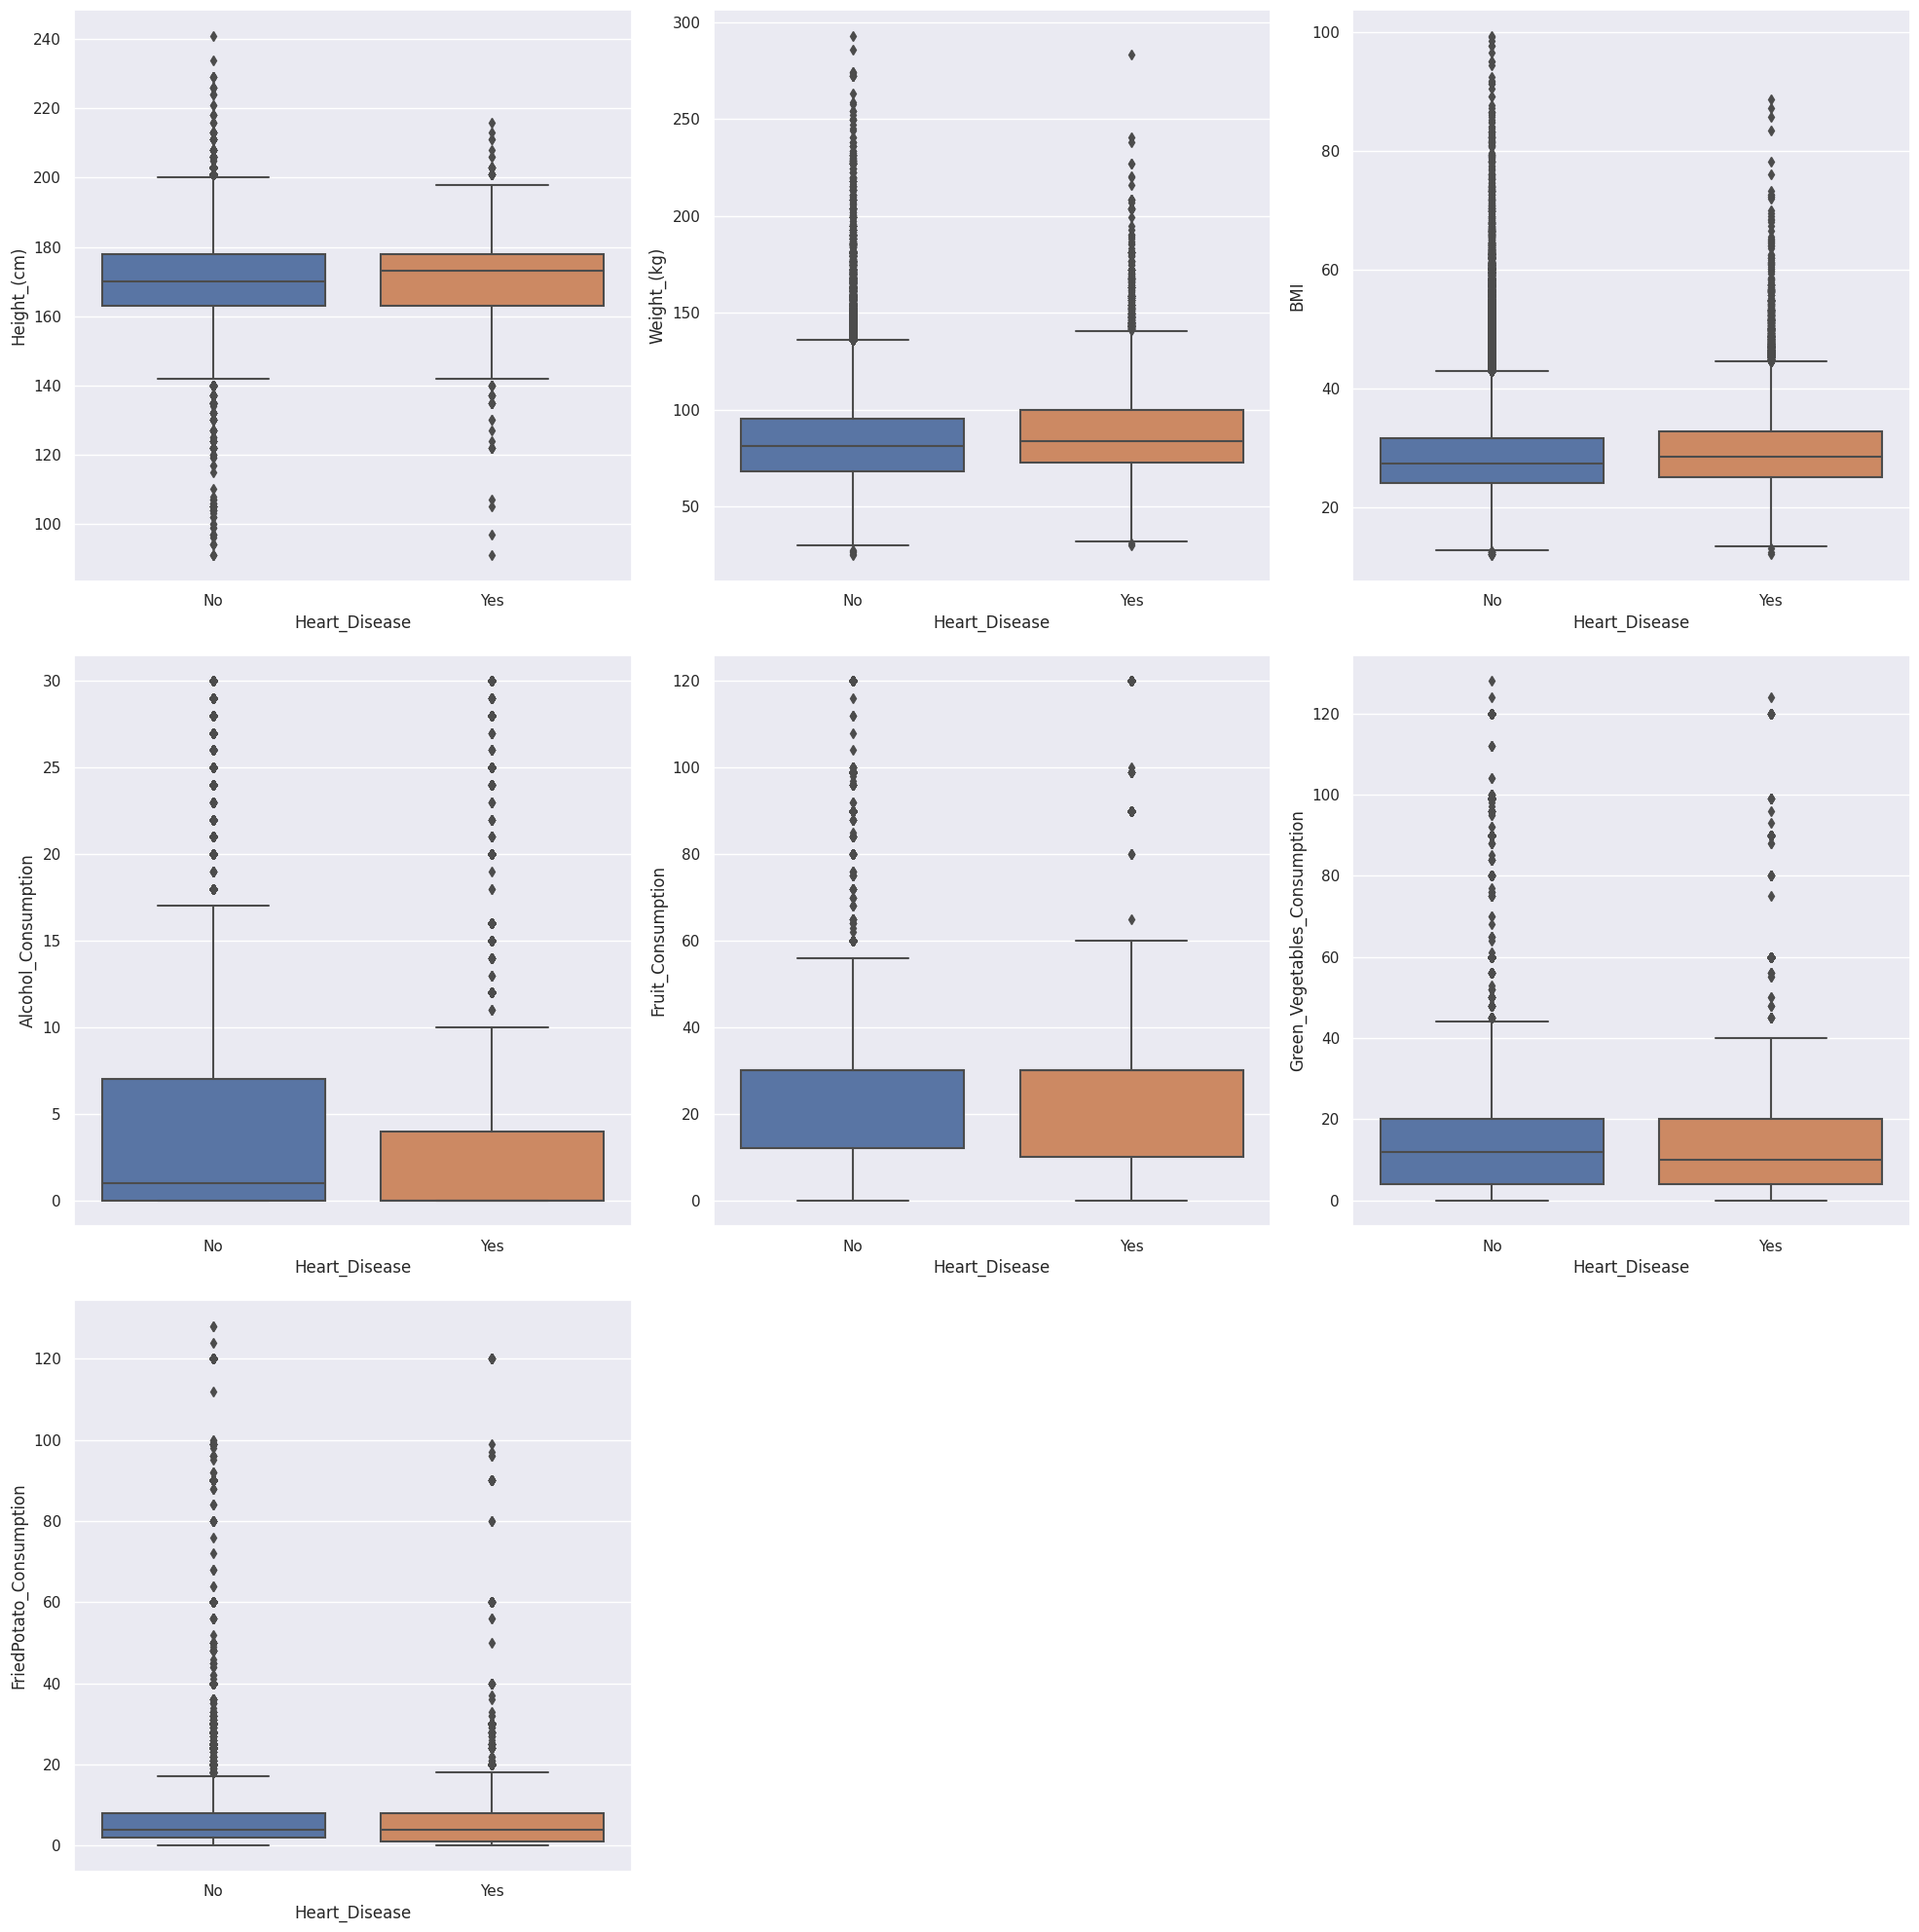

In [12]:
fig, axs = plt.subplots(nrows = 3, ncols =3, figsize = (20,20))
axs = axs.flatten()

# creating box plot for each category value
for i, var in enumerate(num_vars):
    sns.boxplot(y = var, x ="Heart_Disease", data = df, ax = axs[i])

# adjusting spacing
fig.tight_layout()

# removing the subplot 8
fig.delaxes(axs[7])

# removing the subplot 9
fig.delaxes(axs[8])

#show plot
plt.show()

In [13]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending = False)

Series([], dtype: float64)

In [14]:
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].unique()}")

General_Health: ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Exercise: ['No' 'Yes']
Heart_Disease: ['No' 'Yes']
Skin_Cancer: ['No' 'Yes']
Other_Cancer: ['No' 'Yes']
Depression: ['No' 'Yes']
Diabetes: ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Arthritis: ['Yes' 'No']
Sex: ['Female' 'Male']
Age_Category: ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
Smoking_History: ['Yes' 'No']


In [15]:
#loop over each column where data type is object
for col in df.select_dtypes(include=["object"]).columns:
    label_encoder = preprocessing.LabelEncoder()

    #fit the encoder
    label_encoder.fit(df[col].unique())

    #transform the column
    df[col] = label_encoder.transform(df[col])

    #print the columns and unique encoded values
    print(f"{col}: {df[col].unique()}")

General_Health: [3 4 2 1 0]
Checkup: [2 4 0 3 1]
Exercise: [0 1]
Heart_Disease: [0 1]
Skin_Cancer: [0 1]
Other_Cancer: [0 1]
Depression: [0 1]
Diabetes: [0 2 1 3]
Arthritis: [1 0]
Sex: [0 1]
Age_Category: [10  8 11 12  9  6  5  0  2  7  3  4  1]
Smoking_History: [1 0]


<Axes: >

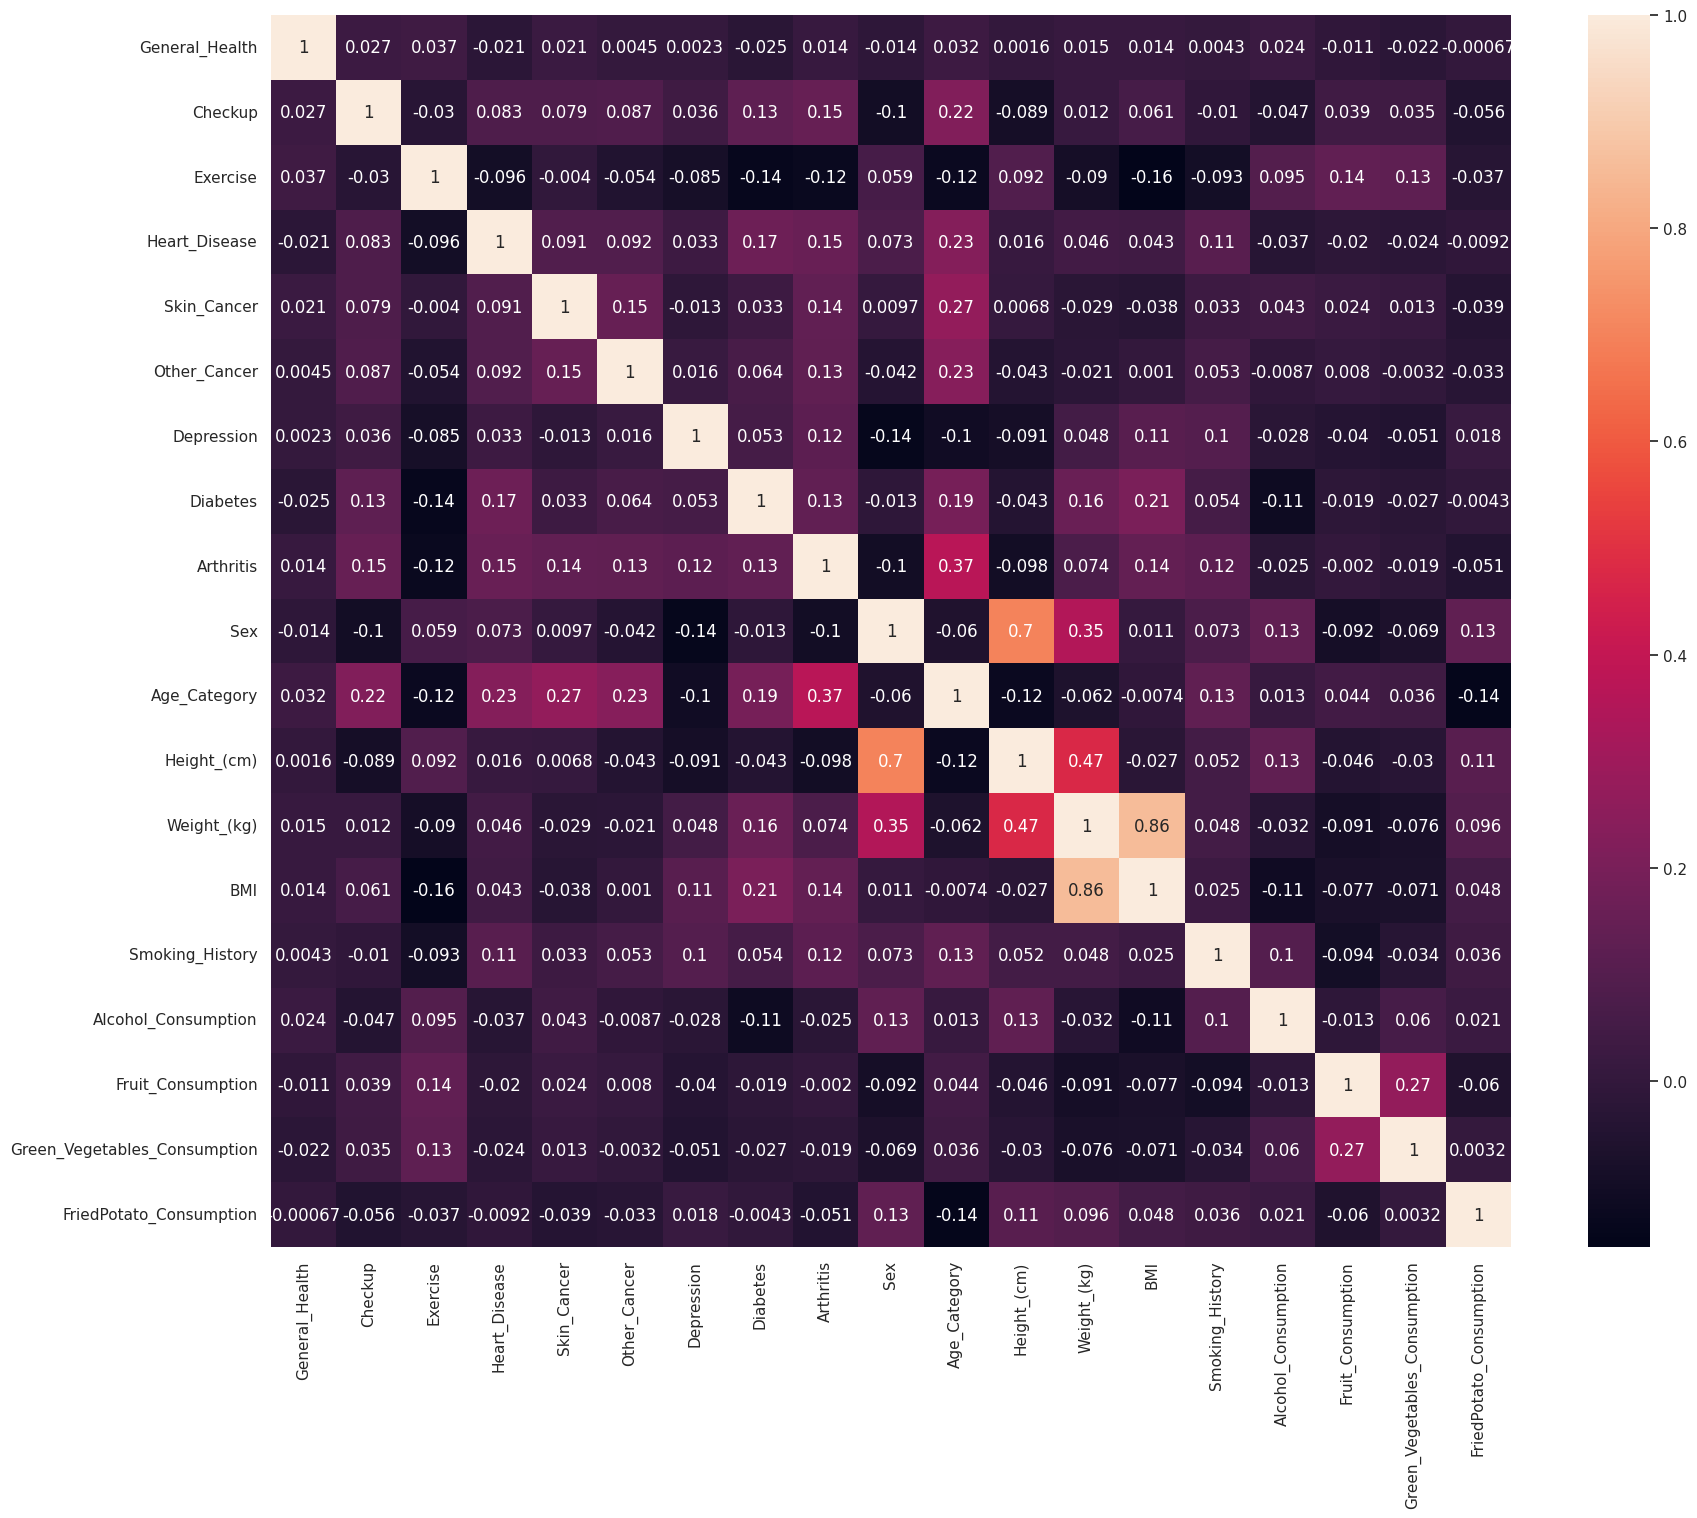

In [16]:
#corelation heat map
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), fmt = ".2g", annot = True)

In [17]:
X = df.drop("Heart_Disease", axis = 1)
y = df["Heart_Disease"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
columns = ["Height_(cm)", "Weight_(kg)", "BMI", "Alcohol_Consumption", "Fruit_Consumption",
           "Green_Vegetables_Consumption", "FriedPotato_Consumption"]

In [20]:
Q1 = X_train[columns].quantile(0.25)
Q3 = X_train[columns].quantile(0.75)
IQR = Q3 - Q1

In [21]:
threshold = 1.5

In [22]:
outlier = np.where(
    (X_train[columns] < (Q1 - threshold * IQR)) |
    (X_train[columns] > (Q3 + threshold * IQR))
)[0]

In [23]:
X_train = X_train.drop(X_train.index[outlier])
y_train = y_train.drop(y_train.index[outlier])

In [24]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=12, min_samples_leaf=2,
                              class_weight="balanced")

In [25]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=2, random_state=0)

In [26]:
y_pred = dtree.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.7144938563403539


In [27]:
print("F-1 Score: ", (f1_score(y_test, y_pred, average="micro")))
print("Precision Score: ", (precision_score(y_test, y_pred, average="micro")))
print("Recall Score: ", (recall_score(y_test, y_pred, average="micro")))
print("Jaccard Score: ", (jaccard_score(y_test, y_pred, average="micro")))

F-1 Score:  0.7144938563403539
Precision Score:  0.7144938563403539
Recall Score:  0.7144938563403539
Jaccard Score:  0.5558074225194253


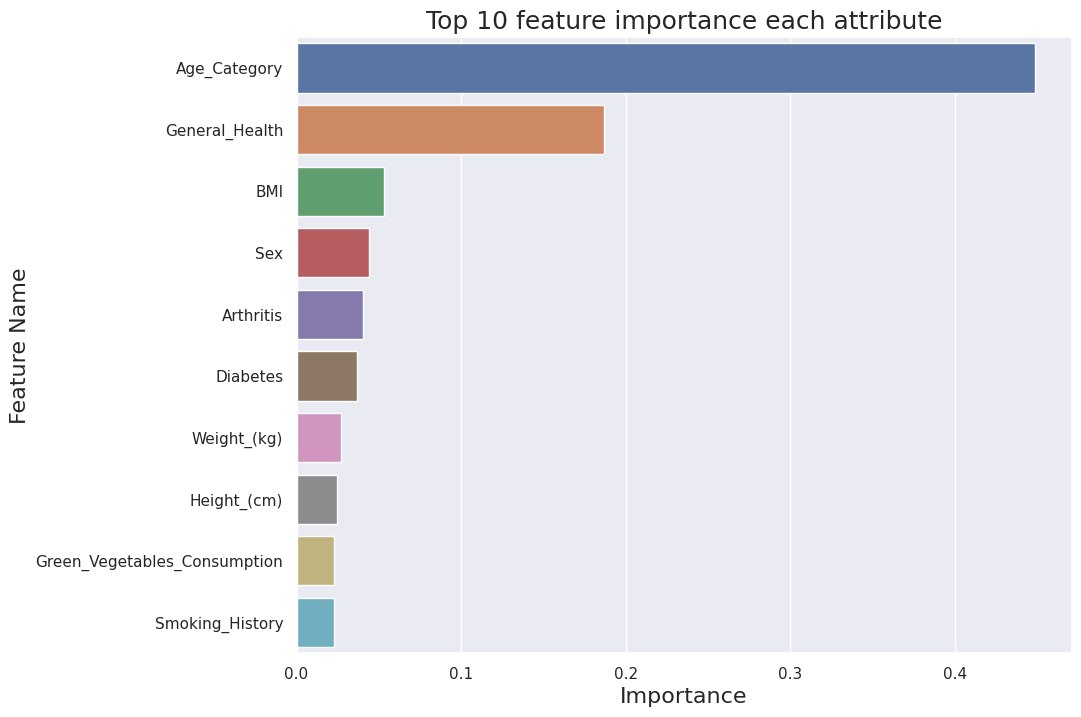

In [28]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})

fi = imp_df.sort_values(by="Importance", ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x="Importance", y="Feature Name")
plt.title("Top 10 feature importance each attribute", fontsize=18)
plt.xlabel("Importance", fontsize=16)
plt.ylabel("Feature Name", fontsize=16)
plt.show()

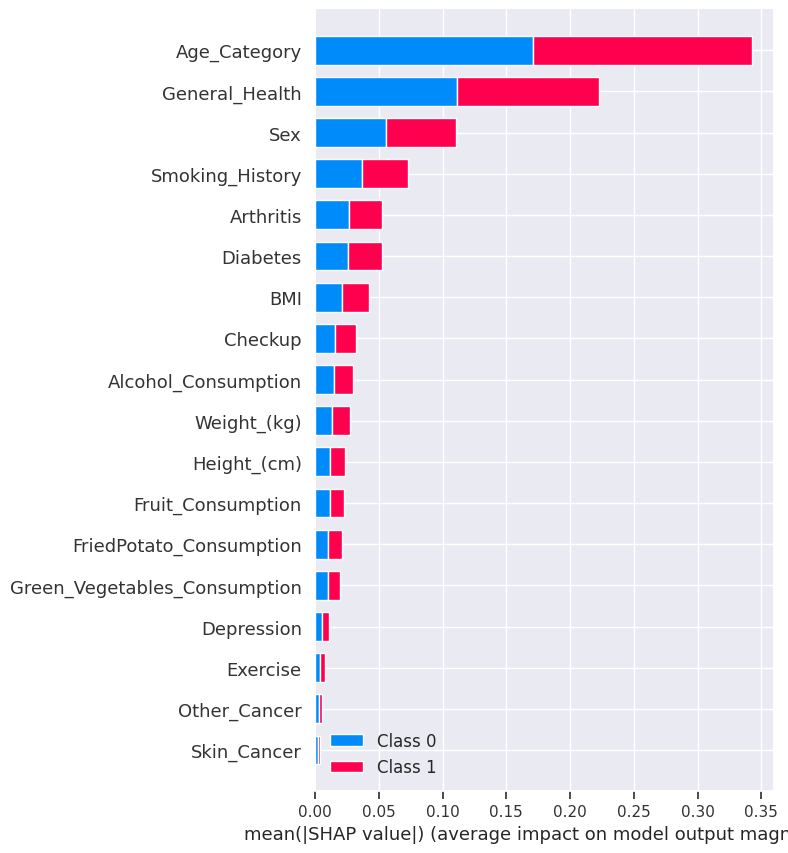

In [29]:
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accuracy Score: 0.7144938563403539')

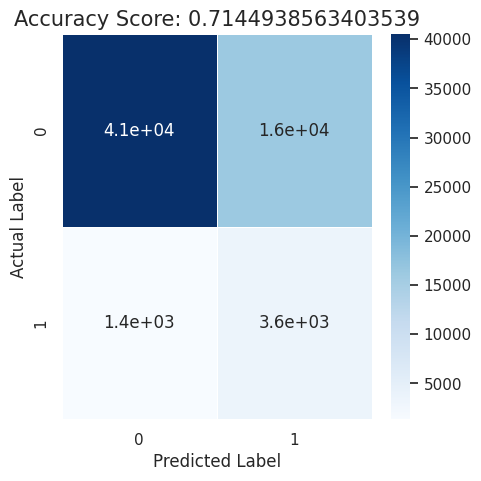

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidth=.5,annot=True, cmap = "Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
all_sample_title = "Accuracy Score: {0}".format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

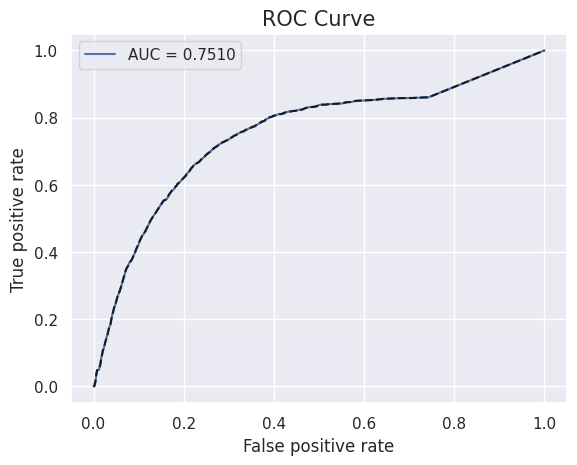

In [31]:
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"]),
                                     pd.DataFrame(y_pred_proba, columns=["y_pred_proba"])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted["y_actual"], df_actual_predicted["y_pred_proba"])
auc = roc_auc_score(df_actual_predicted["y_actual"], df_actual_predicted["y_pred_proba"])

plt.plot(fpr, tpr, label = "AUC = %0.4f" %auc)
plt.plot(fpr, tpr, linestyle = "--", color = "k")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve", size = 15)
plt.legend()

In [32]:
rfc = RandomForestClassifier(random_state=0, max_features="sqrt", n_estimators=200,
                              class_weight="balanced")

In [33]:
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=0)

In [34]:
y_pred = rfc.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.9191044341195707


In [35]:
print("F-1 Score: ", (f1_score(y_test, y_pred, average="micro")))
print("Precision Score: ", (precision_score(y_test, y_pred, average="micro")))
print("Recall Score: ", (recall_score(y_test, y_pred, average="micro")))
print("Jaccard Score: ", (jaccard_score(y_test, y_pred, average="micro")))
print("Log loss: ", (log_loss(y_test, y_pred)))

F-1 Score:  0.9191044341195707
Precision Score:  0.9191044341195707
Recall Score:  0.9191044341195707
Jaccard Score:  0.8503175173735922
Log loss:  2.9157717373106866


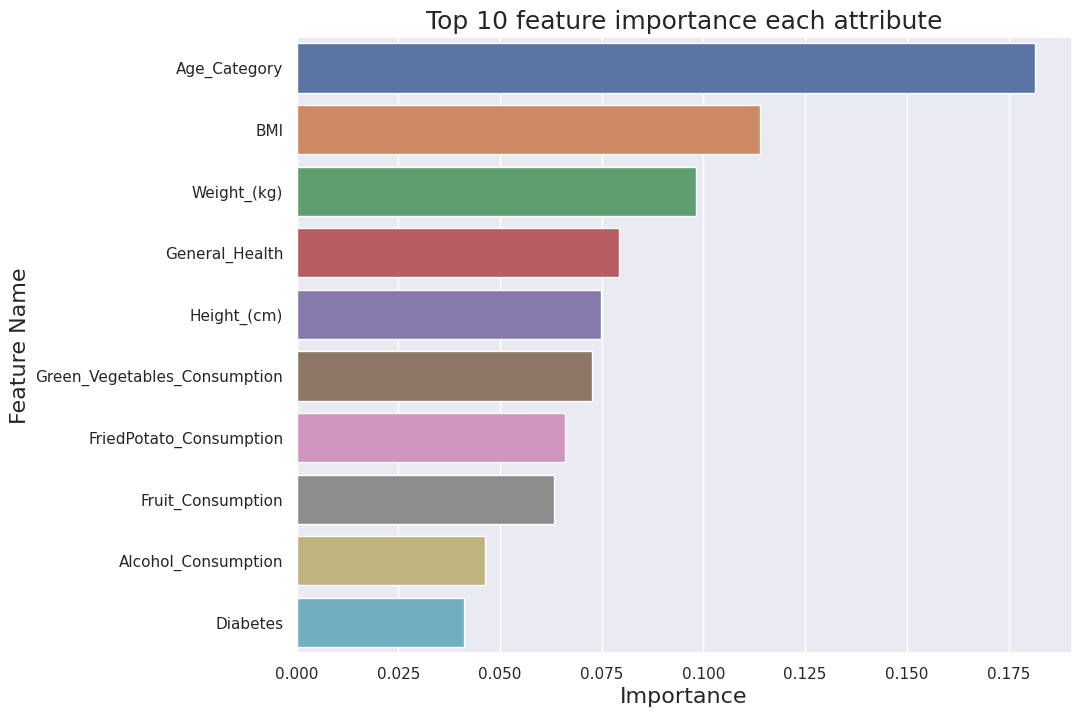

In [36]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})

fi = imp_df.sort_values(by="Importance", ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x="Importance", y="Feature Name")
plt.title("Top 10 feature importance each attribute", fontsize=18)
plt.xlabel("Importance", fontsize=16)
plt.ylabel("Feature Name", fontsize=16)
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [38]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [39]:
y_pred_logreg = logreg.predict(X_test)
print("Accuracy score (Logistic Regression):", accuracy_score(y_test, y_pred_logreg))

Accuracy score (Logistic Regression): 0.9187482799371873


In [40]:
# Cross-validation to check for overfitting
dtree_cv = DecisionTreeClassifier(random_state=0, max_depth=12, min_samples_leaf=2, class_weight="balanced")
rfc_cv = RandomForestClassifier(random_state=0, max_features="sqrt", n_estimators=200, class_weight="balanced")

In [41]:
# Decision Tree Cross-validation
dtree_scores = cross_val_score(dtree_cv, X_train, y_train, cv=5)
print("Decision Tree Cross-validation Scores:", dtree_scores)
print("Mean Decision Tree Cross-validation Score:", np.mean(dtree_scores))

Decision Tree Cross-validation Scores: [0.73106395 0.71194141 0.70200719 0.71376259 0.70328553]
Mean Decision Tree Cross-validation Score: 0.7124121316071953


In [42]:
# Random Forest Cross-validation
rfc_scores = cross_val_score(rfc_cv, X_train, y_train, cv=5)
print("Random Forest Cross-validation Scores:", rfc_scores)
print("Mean Random Forest Cross-validation Score:", np.mean(rfc_scores))

Random Forest Cross-validation Scores: [0.91421984 0.91483013 0.91455889 0.91411521 0.91448818]
Mean Random Forest Cross-validation Score: 0.9144424534033867


In [43]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [44]:
# Hyperparameter tuning for Decision Tree
param_grid_dtree = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': [None, 'balanced']
}

grid_search_dtree = GridSearchCV(dtree_cv, param_grid=param_grid_dtree, cv=5)
grid_search_dtree.fit(X_train, y_train)

best_dtree = grid_search_dtree.best_estimator_
y_pred_best_dtree = best_dtree.predict(X_test)
print("Best Decision Tree Model - Accuracy:", accuracy_score(y_test, y_pred_best_dtree))

Best Decision Tree Model - Accuracy: 0.919476777128426


In [45]:
# Hyperparameter tuning for Random Forest
param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

grid_search_rfc = GridSearchCV(rfc_cv, param_grid=param_grid_rfc, cv=5)
grid_search_rfc.fit(X_train, y_train)

best_rfc = grid_search_rfc.best_estimator_
y_pred_best_rfc = best_rfc.predict(X_test)
print("Best Random Forest Model - Accuracy:", accuracy_score(y_test, y_pred_best_rfc))

Best Random Forest Model - Accuracy: 0.9191044341195707


In [46]:
# XGBoost
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Model - Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Model - Accuracy: 0.9198167424843373


In [47]:
# SVM
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("SVM Model - Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Model - Accuracy: 0.9192501335578184
